# Comparisons of Axis-Aligned and Oblique Random Forests

We refer to the scikit-learn tutorial in [1](https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py) that shows a similar comparison for regular axis-aligned Decision trees.



In [1]:
!conda info


     active environment : base
    active env location : /Users/adam2392/miniconda3
            shell level : 1
       user config file : /Users/adam2392/.condarc
 populated config files : /Users/adam2392/.condarc
          conda version : 4.11.0
    conda-build version : not installed
         python version : 3.9.5.final.0
       virtual packages : __osx=10.16=0
                          __unix=0=0
                          __archspec=1=x86_64
       base environment : /Users/adam2392/miniconda3  (writable)
      conda av data dir : /Users/adam2392/miniconda3/etc/conda
  conda av metadata url : None
           channel URLs : https://conda.anaconda.org/conda-forge/osx-64
                          https://conda.anaconda.org/conda-forge/noarch
          package cache : /Users/adam2392/miniconda3/pkgs
                          /Users/adam2392/.conda/pkgs
       envs directories : /Users/adam2392/miniconda3/envs
                          /Users/adam2392/.conda/envs
               platfor

In [2]:
import sys
import numpy as np

import sklearn
from sklearn.tree import DecisionTreeClassifier, ObliqueDecisionTreeClassifier, plot_tree 
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt

In [3]:
print (sys.version)
print(sklearn.__version__)

3.8.12 | packaged by conda-forge | (default, Oct 12 2021, 21:25:50) 
[Clang 11.1.0 ]
1.1.dev0


First, let's load in some data. For comparisons to the regular ``DecisionTreeClassifier``, we will use the iris dataset.

In [4]:
iris = load_iris()

In [5]:
X, y = iris.data, iris.target

In [6]:
# either axis-aligned
clf = DecisionTreeClassifier()

# or oblique
clf = ObliqueDecisionTreeClassifier()

In [7]:
clf = clf.fit(X, y)

### Exploring the Decision Surface of an Oblique Tree

In [8]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

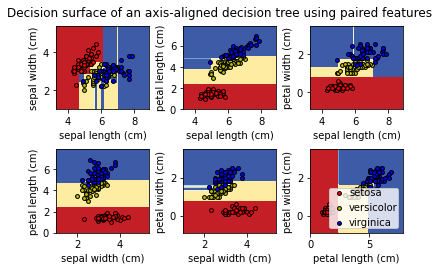

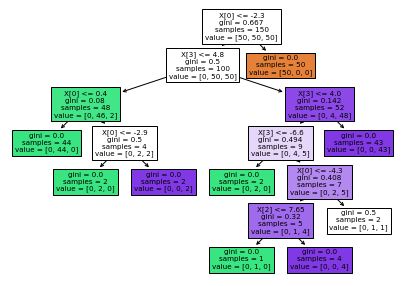

In [9]:
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
#     clf = ObliqueDecisionTreeClassifier()
    clf = DecisionTreeClassifier()
    clf.fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of an axis-aligned decision tree using paired features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure(figsize=(7,5))
clf = ObliqueDecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()

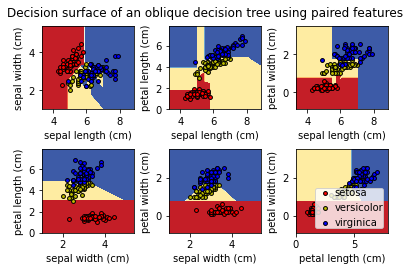

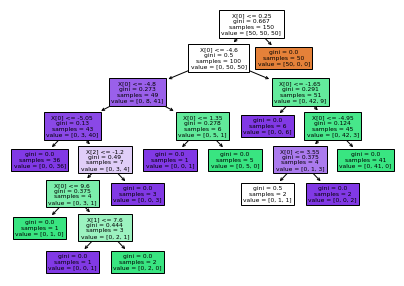

In [10]:
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = ObliqueDecisionTreeClassifier()
#     clf = DecisionTreeClassifier()
    clf.fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of an oblique decision tree using paired features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure(figsize=(7,5))
clf = ObliqueDecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()